In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import datetime
import os 
import warnings
warnings.filterwarnings("ignore")

from rhoova.Client import *


###################################################################################################
                                                                                                  #
from rhoova.Client import *                                                                       #   
#Register and get api key from https://app.rhoova.com/ for ClientConfig("api key", "api secret")  #
config = ClientConfig("", "")                                                                     #
api = Api(config)                                                                                 # 
                                                                                                  #
###################################################################################################


In [2]:
optiondata ={
  "valuationDate": "2021-03-17",
  "settlementDate": "2021-03-17",
  "maturityDate": "2021-09-17",
  "notional": 1000000,
  "optionDefinition": {
    "underlying": "USD",
    "currency": "TRY",
    "callPut": "Call",
    "exerciseType": "European",
    "longShort": "Long",
    "buySell": "Buy",
    "strike":7.81,
    "underlyingPrice":7.5109,
    "volatility": 0.19473,
    "interestRate": 0.16732,
    "riskFreeRate":  0.0028,
    "processType": "BSMerton",
    "method": "Analytic",
    "calendar": "Turkey",
    "businessDayConvention": "ModifiedFollowing",
    "dayCounter": "Actual360",
    "optionStartDate": "2021-03-17",
    "optionEndDate": "2021-09-17",
    "timeSteps": 800,
    "timeGrid": 801
  }
}



In [3]:
def optionprices(optiondata,underlyingPrice,valuationDate):
    optiondata['optionDefinition']['underlyingPrice']=underlyingPrice
    optiondata['optionDefinition']['valuationDate']=valuationDate
    try:
        resultdata = api.createTask(CalculationType.VANILLA_OPTION, optiondata,True)
        result=json.loads(resultdata["result"])
    except RhoovaError as e:
        e.printPretty()
    return result

In [4]:
spotprice=[i/100 for i in range(600, 1000, 1)]
start = datetime.datetime.strptime(optiondata.get('valuationDate'), "%Y-%m-%d")
end = datetime.datetime.strptime(optiondata.get('maturityDate'), "%Y-%m-%d")
date_generated = [(start + datetime.timedelta(days=x)).strftime("%Y-%m-%d") for x in range(0, (end-start).days,11)]
vkgs = [x for x in range(0, (end-start).days,11)]

In [5]:
delta=[]
gamma=[]
vega=[]
theta=[]
rho=[]
for s in spotprice:
    row1 = []
    row2 = [] 
    row3 = [] 
    row4 = [] 
    row5 = [] 
    for dt in date_generated:
        result=optionprices(optiondata,s,dt)
        row1.append(result.get('delta'))
        row2.append(result.get('gamma'))
        row3.append(result.get('vega'))
        row4.append(result.get('theta'))
        row5.append(result.get('rho'))
    delta.append(row1)
    gamma.append(row2)
    vega.append(row3)
    theta.append(row4)
    rho.append(row5)

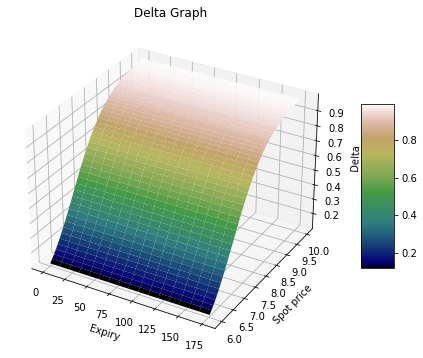

In [6]:

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

# Make data.
X = np.array(vkgs)
Y = np.array(spotprice)
X, Y = np.meshgrid(X, Y)
Z = np.array(delta)

mycmap = plt.get_cmap('gist_earth')
ax.set_title('Delta Graph')
surf1 = ax.plot_surface(X, Y, Z, cmap=mycmap)
fig.colorbar(surf1, ax=ax, shrink=0.5, aspect=5)
ax.set_xlabel('Expiry')
ax.set_ylabel('Spot price')
ax.set_zlabel('Delta')

plt.show()

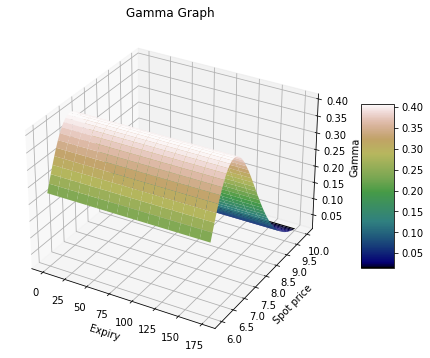

In [7]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')


# Make data.
X = np.array(vkgs)
Y = np.array(spotprice)
X, Y = np.meshgrid(X, Y)
Z = np.array(gamma)

mycmap = plt.get_cmap('gist_earth')
ax.set_title('Gamma Graph')
surf1 = ax.plot_surface(X, Y, Z, cmap=mycmap)
fig.colorbar(surf1, ax=ax, shrink=0.5, aspect=5)
ax.set_xlabel('Expiry')
ax.set_ylabel('Spot price')
ax.set_zlabel('Gamma')

plt.show()

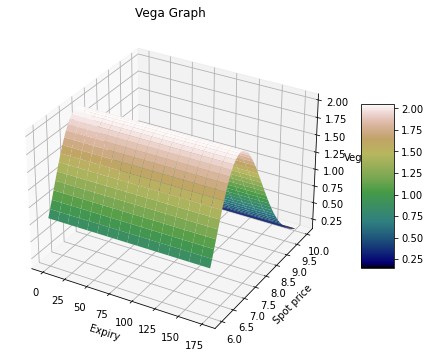

In [8]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')


# Make data.
X = np.array(vkgs)
Y = np.array(spotprice)
X, Y = np.meshgrid(X, Y)
Z = np.array(vega)

mycmap = plt.get_cmap('gist_earth')
ax.set_title('Vega Graph')
surf1 = ax.plot_surface(X, Y, Z, cmap=mycmap)
fig.colorbar(surf1, ax=ax, shrink=0.5, aspect=5)
ax.set_xlabel('Expiry')
ax.set_ylabel('Spot price')
ax.set_zlabel('Vega')

plt.show()

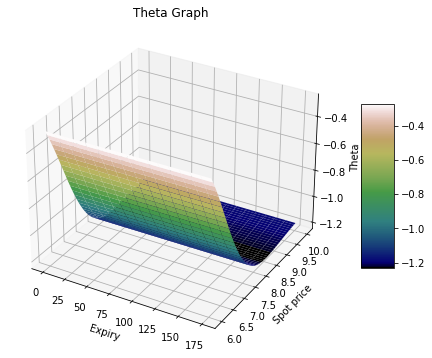

In [9]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')


# Make data.
X = np.array(vkgs)
Y = np.array(spotprice)
X, Y = np.meshgrid(X, Y)
Z = np.array(theta)

mycmap = plt.get_cmap('gist_earth')
ax.set_title('Theta Graph')
surf1 = ax.plot_surface(X, Y, Z, cmap=mycmap)
fig.colorbar(surf1, ax=ax, shrink=0.5, aspect=5)
ax.set_xlabel('Expiry')
ax.set_ylabel('Spot price')
ax.set_zlabel('Theta')

plt.show()

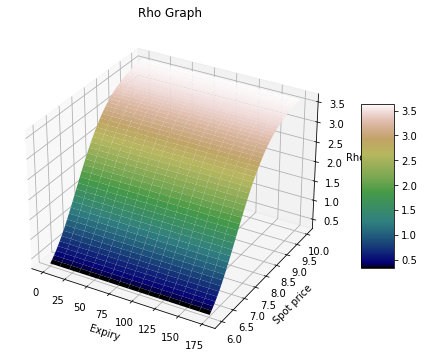

In [10]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')


# Make data.
X = np.array(vkgs)
Y = np.array(spotprice)
X, Y = np.meshgrid(X, Y)
Z = np.array(rho)

mycmap = plt.get_cmap('gist_earth')
ax.set_title('Rho Graph')
surf1 = ax.plot_surface(X, Y, Z, cmap=mycmap)
fig.colorbar(surf1, ax=ax, shrink=0.5, aspect=5)
ax.set_xlabel('Expiry')
ax.set_ylabel('Spot price')
ax.set_zlabel('Rho')

plt.show()